In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

QB Import

In [2]:
QB = pd.read_csv('Week7/Input/Aggregate/QBAggregate.csv')

In [3]:
QBRZ = pd.read_csv('Week7/Input/RZ/QBRZ.csv')

In [7]:
Defense = pd.read_csv('Week7/Input/Defense/Defense.csv')

In [9]:
QBSalaries = pd.read_csv('Week7/Input/Salaries/QBSalaries.csv')

In [10]:
QB7 = pd.read_csv('Week7/Scores/QBWeek7scores.csv')

In [11]:
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']

In [12]:
Vegas = pd.read_csv('Week7/Input/Vegas/Vegas.csv')

In [13]:
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2

In [14]:
QBavg = pd.DataFrame()

In [15]:
QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

In [16]:
QB7scores = pd.DataFrame({'Name': [], 'Score': []})
QB7scores['Name'] = QB7['Name']
QB7scores['Score'] = QB7['FantasyPointsDraftKings']

In [17]:
QB7test = QBavg.set_index('Name').join(QB7scores.set_index('Name'))
QB7test = QB7test.query("Score != 'NaN' and Score > 0")

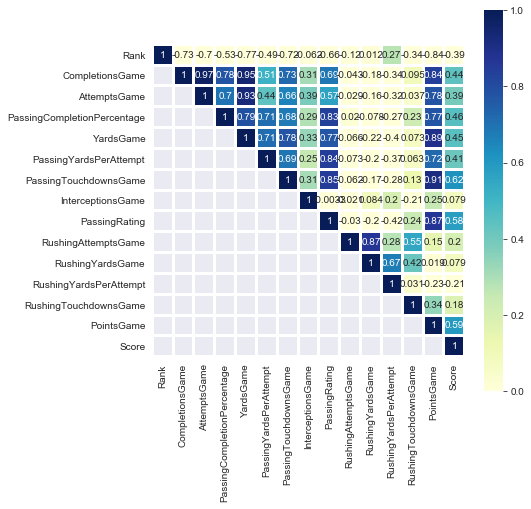

In [18]:
cm = QB7test.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()


In [19]:
QBRZavg = pd.DataFrame()

In [20]:
QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

In [21]:
QB7RZtest = QBRZavg.set_index('Name').join(QB7scores.set_index('Name'))
QB7RZtest = QB7RZtest.query("Score != 'NaN' and Score > 0")

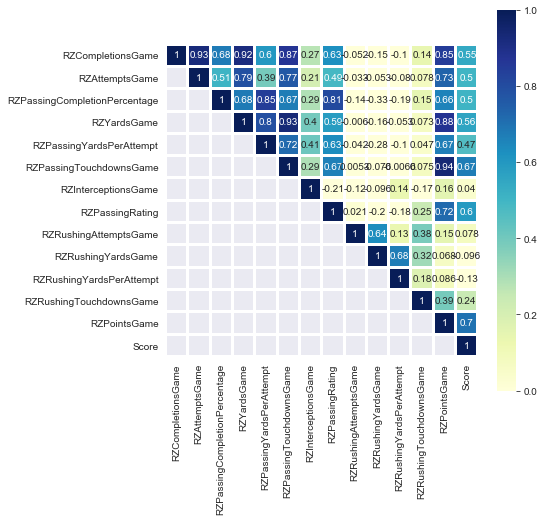

In [22]:
cmRZ = QB7RZtest.corr()
mask = np.zeros_like(cmRZ, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cmRZ, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()


In [23]:
QBRZ = QB7RZtest.drop(['Score'], axis=1)

In [24]:
QB7Vscores = pd.DataFrame({'Name': [], 'Team': [], 'Score': []})
QB7Vscores['Name'] = QB7['Name']
QB7Vscores['Team'] = QB7['Team']
QB7Vscores['Score'] = QB7['FantasyPointsDraftKings']

In [25]:
QB7Vegastest = Vegas.set_index('Team').join(QB7Vscores.set_index('Team'))
QB7Vegastest = QB7Vegastest.query("Score != 'NaN' and Score > 0")

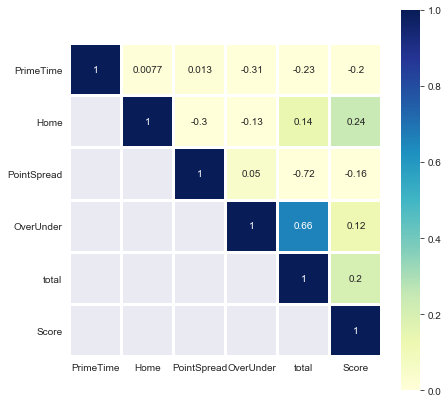

In [26]:
cmV = QB7Vegastest.corr()
mask = np.zeros_like(cmV, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cmV, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()


In [27]:
QBV = QB7Vegastest.set_index('Name').drop(['Score'], axis=1)

In [28]:
QB7Dscores = pd.DataFrame({'Name': [], 'Opponent': [], 'Score': []})
QB7Dscores['Name'] = QB7['Name']
QB7Dscores['Opponent'] = QB7['Opponent']
QB7Dscores['Score'] = QB7['FantasyPointsDraftKings']

In [31]:
QB7D = pd.DataFrame({'Name': [], 'Opponent': [], 'Score': []})
QB7D['Name'] = QB7['Name']
QB7D['Opponent'] = QB7['Opponent']
QB7D['Score'] = QB7['FantasyPointsDraftKings']

In [32]:
QBDtest = QBDef.join(QB7D.set_index('Opponent'), on='Team')
QBDtest = QBDtest.query("Score != 'NaN' and Score > 0")

In [33]:
QBDtest.head()

,Team,DPointsAllowed,Name,Score
0,BAL,14.60,Drew Brees,16.78
0,BAL,14.60,Taysom Hill,2.50
1,JAX,15.37,Deshaun Watson,10.86
2,DAL,17.29,Alex Smith,12.72
4,TEN,17.78,Philip Rivers,23.14


In [34]:
QBDtest['Opponent'] = QBDtest['Team']

In [35]:
QBD2 = QBDtest.set_index('Name').drop(['Team', 'Score'], axis=1)

In [36]:
QBD2.head()

,DPointsAllowed,Opponent
Name,,
Drew Brees,14.60,BAL
Taysom Hill,14.60,BAL
Deshaun Watson,15.37,JAX
Alex Smith,17.29,DAL
Philip Rivers,17.78,TEN


In [37]:
QBcomb = QB7test.join(QBRZ).join(QBV).join(QBD2)

In [30]:
QBcomb.to_csv('Week7QBdata.csv')

In [38]:
QBcomb.columns

Index(['Team', 'Rank', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'PrimeTime', 'Home',
       'PointSpread', 'OverUnder', 'total', 'DPointsAllowed', 'Opponent'],
      dtype='object')

In [39]:
QBcomb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Patrick Mahomes to Lamar Jackson
Data columns (total 36 columns):
Team                             29 non-null object
Rank                             29 non-null int64
CompletionsGame                  29 non-null float64
AttemptsGame                     29 non-null float64
PassingCompletionPercentage      29 non-null float64
YardsGame                        29 non-null float64
PassingYardsPerAttempt           29 non-null float64
PassingTouchdownsGame            29 non-null float64
InterceptionsGame                29 non-null float64
PassingRating                    29 non-null float64
RushingAttemptsGame              29 non-null float64
RushingYardsGame                 29 non-null float64
RushingYardsPerAttempt           29 non-null float64
RushingTouchdownsGame            29 non-null float64
PointsGame                       29 non-null float64
Score                            29 non-null float64
RZCompletionsGame               

In [48]:
X_train = QBcomb.drop(['Score', 'Team', 'Opponent', 'PrimeTime'], axis=1).astype('float64')
y_train = QBcomb.Score

In [43]:
X_train.head()

,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,PrimeTime,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Patrick Mahomes,1.0,22.500000,35.333333,63.7,310.833333,8.8,3.000000,0.666667,112.24,4.000000,...,4.666667,3.5,0.333333,11.5,0.0,1.0,-6.0,57.5,31.75,25.89
Matt Ryan,2.0,26.000000,37.333333,69.6,326.000000,8.7,2.333333,0.333333,113.62,2.333333,...,1.500000,4.5,0.333333,10.5,0.0,1.0,-6.0,54.0,30.00,19.38
Andrew Luck,4.0,31.000000,48.000000,64.6,298.666667,6.2,2.666667,1.333333,88.77,1.833333,...,0.333333,2.0,0.000000,10.9,0.0,1.0,-7.5,43.0,25.25,16.44
Kirk Cousins,5.0,30.833333,43.333333,71.2,320.166667,7.4,2.000000,0.500000,102.74,3.500000,...,1.166667,7.0,0.166667,7.9,0.0,0.0,-3.5,46.5,25.00,20.30
Jared Goff,7.0,22.333333,32.333333,69.1,321.333333,9.9,2.000000,0.833333,110.93,2.833333,...,1.000000,2.0,0.000000,6.6,0.0,0.0,-10.0,52.5,31.25,22.64


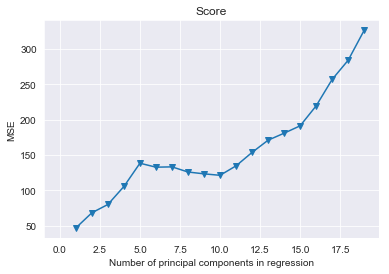

In [49]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [50]:
RB = pd.read_csv('Week7/Input/Aggregate/RBAggregate.csv')

In [51]:
RB_RZ = pd.read_csv('Week7/Input/RZ/RBRZ.csv')

In [52]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']

In [53]:
RB7 = pd.read_csv('Week7/Scores/RBWeek7Scores.csv')
RB7scores = pd.DataFrame({'Name': [], 'Score': []})
RB7scores['Name'] = RB7['Name']
RB7scores['Score'] = RB7['FantasyPointsDraftKings']

In [55]:
RBavg = pd.DataFrame()

In [56]:
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']

In [57]:
RB7test = RBavg.set_index('Name').join(RB7scores.set_index('Name'))
RB7test = RB7test.query("Score != 'NaN' and Score > 0")

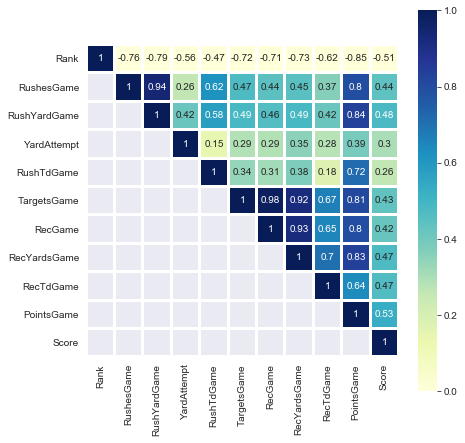

In [58]:
RB1corr = RB7test.corr()
mask = np.zeros_like(RB1corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(RB1corr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [59]:
RBRZavg = pd.DataFrame()

In [60]:
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']

In [61]:
RBRZ7test = RBRZavg.set_index('Name').join(RB7scores.set_index('Name'))
RBRZ7test = RBRZ7test.query("Score != 'NaN' and Score > 0")

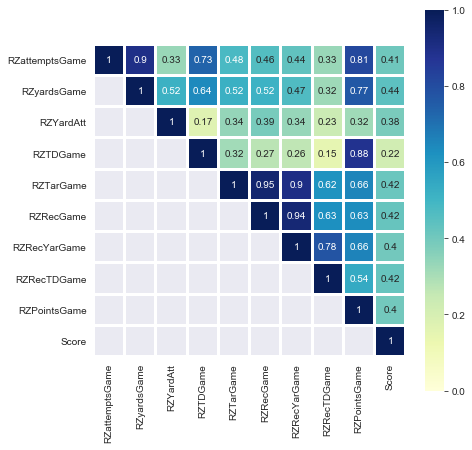

In [62]:
RBRZcorr = RBRZ7test.corr()
mask = np.zeros_like(RBRZcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(RBRZcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [63]:
RBRZ7 = RBRZ7test.drop(['Score'], axis=1)

In [64]:
RB7Vscores = pd.DataFrame({'Name': [], 'Team': [], 'Score': []})
RB7Vscores['Name'] = RB7['Name']
RB7Vscores['Team'] = RB7['Team']
RB7Vscores['Score'] = RB7['FantasyPointsDraftKings']

In [65]:
RB7Vegastest = Vegas.set_index('Team').join(RB7Vscores.set_index('Team'))
RB7Vegastest = RB7Vegastest.query("Score != 'NaN' and Score > 0")

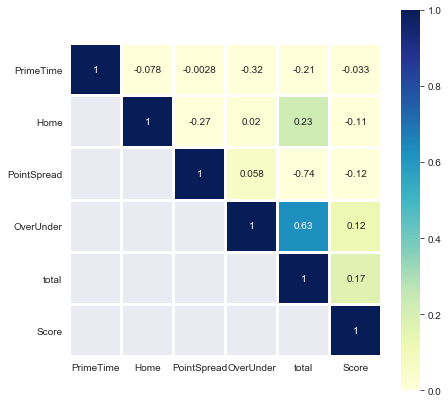

In [66]:
RBVcorr = RB7Vegastest.corr()
mask = np.zeros_like(RBVcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(RBVcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [67]:
RB7V = RB7Vegastest.set_index('Name').drop(['Score'], axis=1)

In [68]:
RB7Dscores = pd.DataFrame({'Name': [], 'Opponent': [], 'Score': []})
RB7Dscores['Name'] = RB7['Name']
RB7Dscores['Opponent'] = RB7['Opponent']
RB7Dscores['Score'] = RB7['FantasyPointsDraftKings']

In [70]:
RB7D = pd.DataFrame({'Name': [], 'Opponent': [], 'Score': []})
RB7D['Name'] = RB7['Name']
RB7D['Opponent'] = RB7['Opponent']
RB7D['Score'] = RB7['FantasyPointsDraftKings']

RBDtest = RBDef.join(RB7D.set_index('Opponent'), on='Team')
RBDtest = RBDtest.query("Score != 'NaN' and Score > 0")

RBDtest['Opponent'] = RBDtest['Team']

RBD2 = RBDtest.set_index('Name').drop(['Team', 'Score'], axis=1)

In [71]:
RBcomb = RB7test.join(RBRZ7).join(RB7V).join(RBD2)

In [73]:
RBcomb.to_csv('Week7RBdata.csv')

In [72]:
RBcomb.columns

Index(['Team', 'Rank', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'PrimeTime', 'Home', 'PointSpread', 'OverUnder',
       'total', 'DPointsAllowed', 'Opponent'],
      dtype='object')

In [73]:
RBcomb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, Todd Gurley to Elijhaa Penny
Data columns (total 28 columns):
Team              71 non-null object
Rank              71 non-null int64
RushesGame        71 non-null float64
RushYardGame      71 non-null float64
YardAttempt       71 non-null float64
RushTdGame        71 non-null float64
TargetsGame       71 non-null float64
RecGame           71 non-null float64
RecYardsGame      71 non-null float64
RecTdGame         71 non-null float64
PointsGame        71 non-null float64
Score             71 non-null float64
RZattemptsGame    71 non-null float64
RZyardsGame       71 non-null float64
RZYardAtt         71 non-null float64
RZTDGame          71 non-null float64
RZTarGame         71 non-null float64
RZRecGame         71 non-null float64
RZRecYarGame      71 non-null float64
RZRecTDGame       71 non-null float64
RZPointsGame      71 non-null float64
PrimeTime         71 non-null bool
Home              71 non-null bool
PointSpread     

In [74]:
X_train = RBcomb.drop(['Score', 'Team', 'PrimeTime', 'Opponent'], axis=1).astype('float64')
y_train = RBcomb.Score

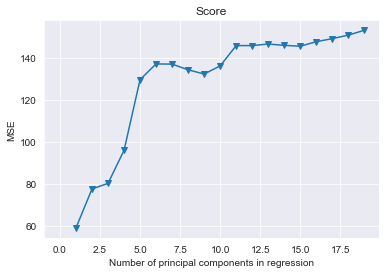

In [75]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

WR testing

In [76]:
WR = pd.read_csv('Week7/Input/Aggregate/WRAggregate.csv')

In [77]:
WRRZ = pd.read_csv('Week7/Input/RZ/WRRZ.csv')

In [79]:
WR7 = pd.read_csv('Week7/Scores/WRWeek7Scores.csv')

In [80]:
WR7scores = pd.DataFrame({'Name': [], 'Score': []})
WR7scores['Name'] = WR7['Name']
WR7scores['Score'] = WR7['FantasyPointsDraftKings']

In [81]:
WRavg = pd.DataFrame()

In [82]:
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']

In [83]:
WR7test = WRavg.set_index('Name').join(WR7scores.set_index('Name'))
WR7test = WR7test.query("Score != 'NaN' and Score > 0")

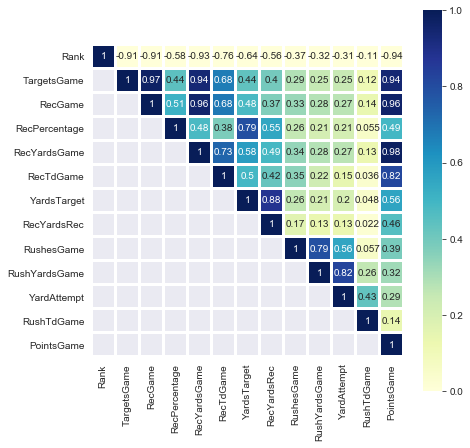

In [84]:
WRcorr = WRavg.corr()
mask = np.zeros_like(WRcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(WRcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [85]:
WRRZavg = pd.DataFrame()

In [86]:
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']

In [87]:
WRRZavg.head()

,Name,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
0,Davante Adams,2.500000,1.166667,46.7,11.000000,1.000000,4.4,9.4,0.0,0.0,0.0,0.0,8.3
1,Michael Thomas,2.400000,2.000000,83.3,14.800000,0.600000,6.2,7.4,0.0,0.0,0.0,0.0,7.1
2,Calvin Ridley,0.833333,0.833333,100.0,9.333333,0.666667,11.2,11.2,0.0,0.0,0.0,0.0,5.8
3,Chris Godwin,1.600000,0.800000,50.0,6.000000,0.800000,3.8,7.5,0.0,0.0,0.0,0.0,6.2
4,Tyler Boyd,1.166667,1.166667,100.0,9.500000,0.500000,8.1,8.1,0.0,0.0,0.0,0.0,5.1


In [88]:
WRRZ7test = WRRZavg.set_index('Name').join(WR7scores.set_index('Name'))
WRRZ7test = WRRZ7test.query("Score != 'NaN' and Score > 0")

In [89]:
WRRZ7test.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Score
Name,,,,,,,,,,,,,
Michael Thomas,2.400000,2.000000,83.3,14.800000,0.600000,6.2,7.4,0.0,0.0,0.0,0.0,7.1,19.9
Calvin Ridley,0.833333,0.833333,100.0,9.333333,0.666667,11.2,11.2,0.0,0.0,0.0,0.0,5.8,9.3
Chris Godwin,1.600000,0.800000,50.0,6.000000,0.800000,3.8,7.5,0.0,0.0,0.0,0.0,6.2,10.9
Tyler Boyd,1.166667,1.166667,100.0,9.500000,0.500000,8.1,8.1,0.0,0.0,0.0,0.0,5.1,5.7
Alshon Jeffery,2.333333,1.666667,71.4,15.000000,1.000000,6.4,9.0,0.0,0.0,0.0,0.0,9.2,21.8


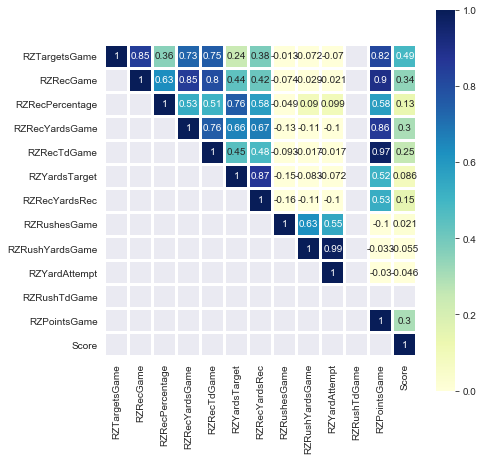

In [90]:
WRRZcorr = WRRZ7test.corr()
mask = np.zeros_like(WRRZcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(WRRZcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [91]:
WRRZ7 = WRRZ7test.drop(['Score'], axis=1)

In [92]:
WR7Vscores = pd.DataFrame({'Name': [], 'Team': [], 'Score': []})
WR7Vscores['Name'] = WR7['Name']
WR7Vscores['Team'] = WR7['Team']
WR7Vscores['Score'] = WR7['FantasyPointsDraftKings']

In [93]:
WR7Vegastest = Vegas.set_index('Team').join(WR7Vscores.set_index('Team'))
WR7Vegastest = WR7Vegastest.query("Score != 'NaN' and Score > 0")

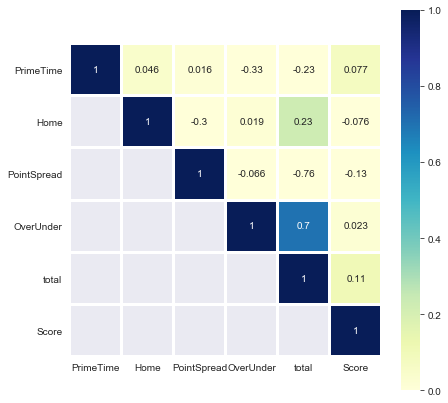

In [94]:
WRVcorr = WR7Vegastest.corr()
mask = np.zeros_like(WRVcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(WRVcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [95]:
WR7V = WR7Vegastest.set_index('Name').drop(['Score'], axis=1)

In [99]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']

WR7D = pd.DataFrame({'Name': [], 'Opponent': [], 'Score': []})
WR7D['Name'] = WR7['Name']
WR7D['Opponent'] = WR7['Opponent']
WR7D['Score'] = WR7['FantasyPointsDraftKings']

WRDtest = WRDef.join(WR7D.set_index('Opponent'), on='Team')
WRDtest = WRDtest.query("Score != 'NaN' and Score > 0")

WRDtest['Opponent'] = WRDtest['Team']

WRD2 = WRDtest.set_index('Name').drop(['Team', 'Score'], axis=1)

In [100]:
WRcomb = WR7test.join(WRRZ7).join(WR7V).join(WRD2)

In [91]:
WRcomb.to_csv('Week7WRdata.csv')

In [101]:
WRcomb.columns

Index(['Rank', 'Team', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'PrimeTime', 'Home', 'PointSpread', 'OverUnder', 'total',
       'DPointsAllowed', 'Opponent'],
      dtype='object')

In [102]:
X_train = WRcomb.drop(['Score', 'Team', 'PrimeTime', 'Opponent'], axis=1).astype('float64')
y_train = WRcomb.Score

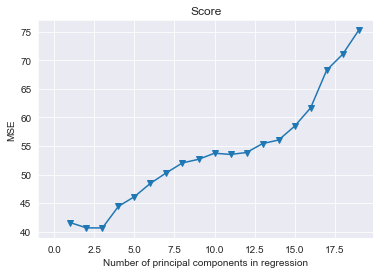

In [103]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [104]:
TE = pd.read_csv('Week7/Input/Aggregate/TEAggregate.csv')

In [105]:
TE.head()

,Rank,Name,Team,Position,Played,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,...,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Zach Ertz,PHI,TE,6,67,48,71.6,480,2,...,7.2,10.0,0,0,0,0,0,0,19.0,114.0
1,2,Travis Kelce,KC,TE,6,55,33,60.0,468,3,...,8.5,14.2,0,0,0,0,0,0,17.8,106.8
2,3,Eric Ebron,IND,TE,6,52,30,57.7,326,6,...,6.3,10.9,1,-1,-1,0,0,0,16.9,101.5
3,4,Jared Cook,OAK,TE,6,43,32,74.4,400,2,...,9.3,12.5,0,0,0,0,0,0,15.0,90.0
4,5,George Kittle,SF,TE,6,41,27,65.9,429,1,...,10.5,15.9,0,0,0,0,0,0,13.5,80.9


In [106]:
TE.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Played', 'ReceivingTargets',
       'Receptions', 'ReceptionPercentage', 'ReceivingYards',
       'ReceivingTouchdowns', 'ReceivingLong', 'ReceivingYardsPerTarget',
       'ReceivingYardsPerReception', 'RushingAttempts', 'RushingYards',
       'RushingYardsPerAttempt', 'RushingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameDraftKings', 'FantasyPointsDraftKings'],
      dtype='object')

In [107]:
TEavg = pd.DataFrame()

In [108]:
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']

In [109]:
TERZ = pd.read_csv('Week7/Input/RZ/TERZ.csv')
TE7 = pd.read_csv('Week7/Scores/TEWeek7Scores.csv')
TE7scores = pd.DataFrame({'Name': [], 'Score': []})
TE7scores['Name'] = TE7['Name']
TE7scores['Score'] = TE7['FantasyPointsDraftKings']

In [110]:
TE7test = TEavg.set_index('Name').join(TE7scores.set_index('Name'))
TE7test = TE7test.query("Score != 'NaN' and Score > 0")

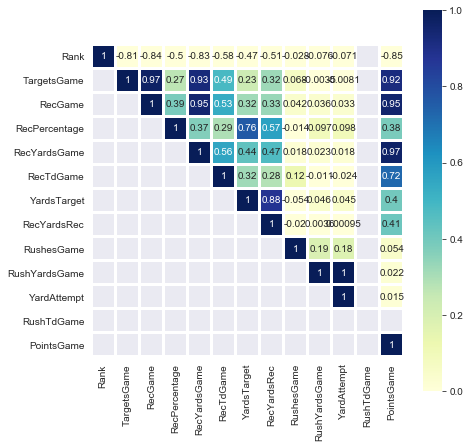

In [111]:
TEcorr = TEavg.corr()
mask = np.zeros_like(TEcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(TEcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [112]:
TERZavg = pd.DataFrame()

In [113]:
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']

In [114]:
TERZ7test = TERZavg.set_index('Name').join(TE7scores.set_index('Name'))
TERZ7test = TERZ7test.query("Score != 'NaN' and Score > 0")

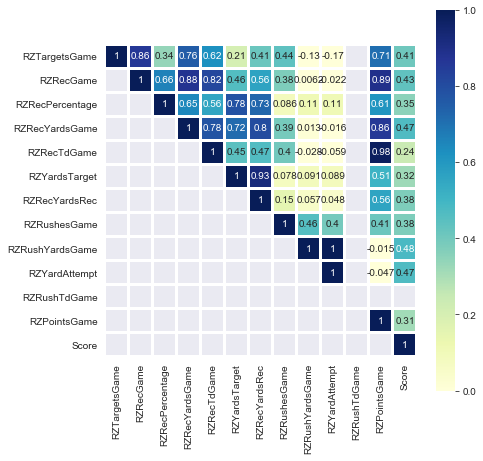

In [115]:
TERZcorr = TERZ7test.corr()
mask = np.zeros_like(TERZcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(TERZcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()


In [116]:
TERZ7 = TERZ7test.drop(['Score'], axis=1)

In [117]:
TE7Vscores = pd.DataFrame({'Name': [], 'Team': [], 'Score': []})
TE7Vscores['Name'] = TE7['Name']
TE7Vscores['Team'] = TE7['Team']
TE7Vscores['Score'] = TE7['FantasyPointsDraftKings']

In [118]:
TE7Vegastest = Vegas.set_index('Team').join(TE7Vscores.set_index('Team'))
TE7Vegastest = TE7Vegastest.query("Score != 'NaN' and Score > 0")

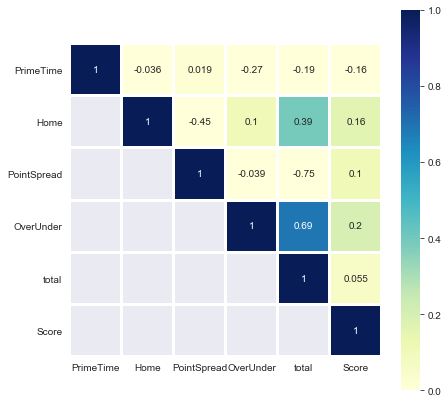

In [119]:
TEVcorr = TE7Vegastest.corr()
mask = np.zeros_like(TEVcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(TEVcorr, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

In [120]:
TE7V = TE7Vegastest.set_index('Name').drop(['Score'], axis=1)

In [121]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']

TE7D = pd.DataFrame({'Name': [], 'Opponent': [], 'Score': []})
TE7D['Name'] = TE7['Name']
TE7D['Opponent'] = TE7['Opponent']
TE7D['Score'] = TE7['FantasyPointsDraftKings']

TEDtest = TEDef.join(TE7D.set_index('Opponent'), on='Team')
TEDtest = TEDtest.query("Score != 'NaN' and Score > 0")

TEDtest['Opponent'] = TEDtest['Team']

TED2 = TEDtest.set_index('Name').drop(['Team', 'Score'], axis=1)

In [122]:
TEcomb = TE7test.join(TERZ7).join(TE7V).join(TED2)

In [107]:
TEcomb.to_csv('Week7TEdata.csv')

In [123]:
TEcomb.columns

Index(['Rank', 'Team', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'PrimeTime', 'Home', 'PointSpread', 'OverUnder', 'total',
       'DPointsAllowed', 'Opponent'],
      dtype='object')

In [124]:
X_train = TEcomb.drop(['Score', 'Team', 'PrimeTime', 'Opponent'], axis=1).astype('float64')
y_train = TEcomb.Score

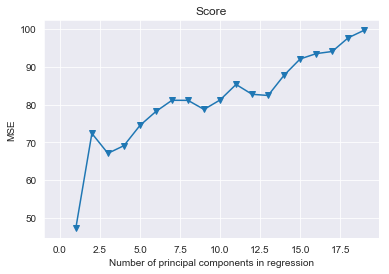

In [125]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);